In [41]:
%load_ext autoreload
from src.utils import VideoInterpTripletsDataset
from src.train import trainGAN
from src.eval import evalGAN

from torch.utils.data import DataLoader
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%autoreload 2

In [43]:
dataset = VideoInterpTripletsDataset('datasets/frames_512/train', read_frames=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
valset = VideoInterpTripletsDataset('datasets/frames_512/val',read_frames=True)
valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4)

Filenames
['dna', 'ddd', 'baby-dont-stop', 'bad-boy', 'la-vie-en-rose']
Frame read, (h,w) is (288,512)
Filenames
['tempo', 'wow']
Frame read, (h,w) is (288,512)


Video (h,w): (288, 512)
Created models
GPU: Tesla V100-SXM2-16GB, number: 0
GPU: Tesla V100-SXM2-16GB, number: 1
Initialized weights
Set up models


Generated images
Image device and mean
cpu
tensor(-0.2092)
Mean of image: 100.32414518132255


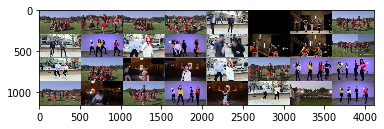

Real images
Image device and mean
cpu
tensor(-0.2114)
Mean of image: 99.94871583005401


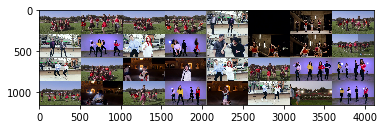

./experiments/unet/1/val.jpg_generated.png
./experiments/unet/1/val.jpg_real.png

epoch 1 out of 20
discriminator loss:1.1572823524475098, generator loss:0.0053176237270236015
generator GAN loss:0.9222491979598999, supervised loss:0.005225398577749729
discriminator mean real prediction:0.5356235504150391, mean fake prediction:0.4036233723163605

runtime: 648.0803482532501
Avg. PNSR on val:18.6157 dB


Generated images
Image device and mean
cpu
tensor(-0.2086)
Mean of image: 100.39906399680254


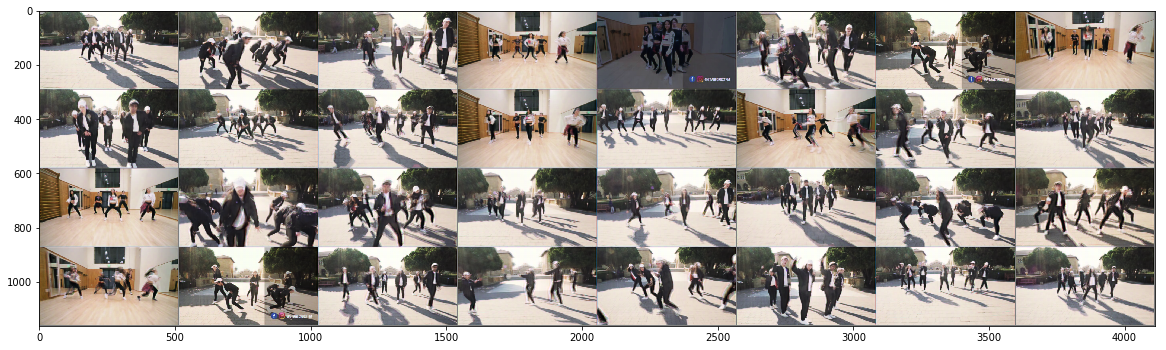

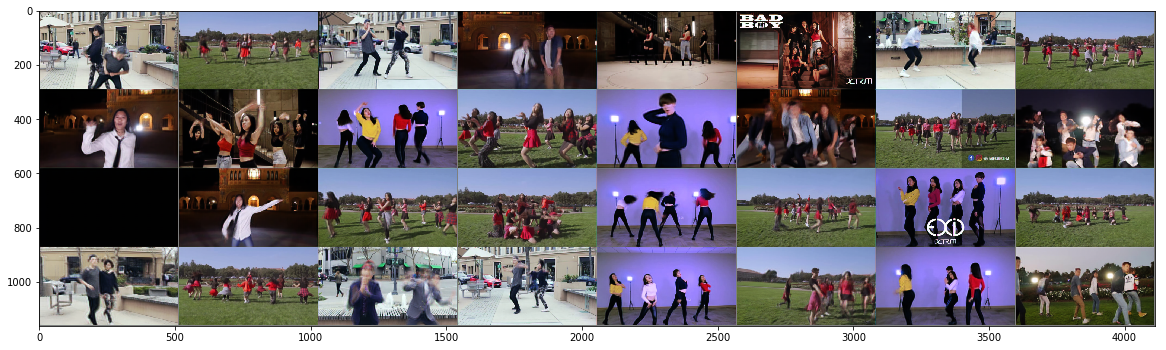

Real images
Image device and mean
cpu
tensor(-0.2100)
Mean of image: 100.12189720058092


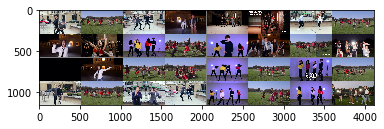

./experiments/unet/2/val.jpg_generated.png
./experiments/unet/2/val.jpg_real.png

epoch 2 out of 20
discriminator loss:4.488584995269775, generator loss:0.003657061606645584
generator GAN loss:0.011431756429374218, supervised loss:0.0036559184081852436
discriminator mean real prediction:0.9886335730552673, mean fake prediction:0.988633394241333

runtime: 650.9477388858795
Avg. PNSR on val:19.8073 dB


In [ ]:
generator, discriminator = trainGAN(20, dataloader,valloader=valloader, save_path='./experiments/unet', save_every=5)

In [10]:
# valset = VideoInterpTripletsDataset('datasets/frames_512/val',read_frames=True)
# valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4)

Filenames
['tempo', 'wow']
Frame read, (h,w) is (288,512)


/home/jupyter/Deep-Frame-Interpolation/src/eval.py:35: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(os.path.exists(load_path),"model dict does not exist")


./experiments/unet/1_val_generator_generated.png
./experiments/unet/1_val_generator_real.png

Avg. PNSR:18.0761 dB
5007.066914857854


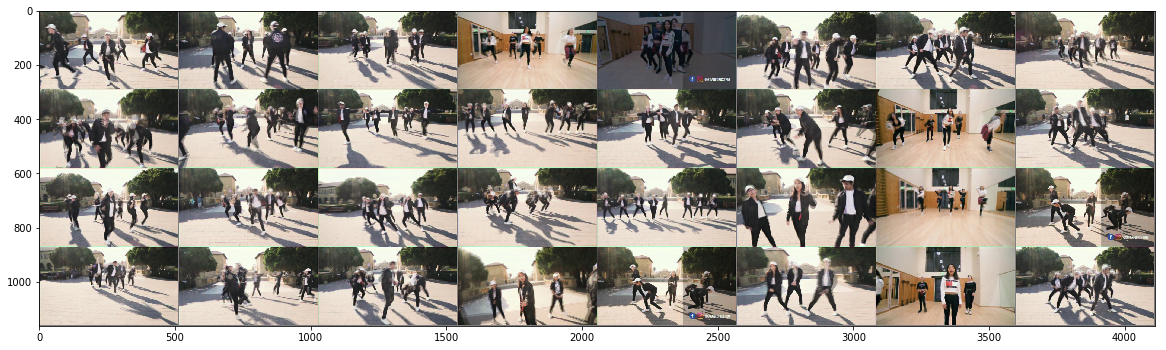

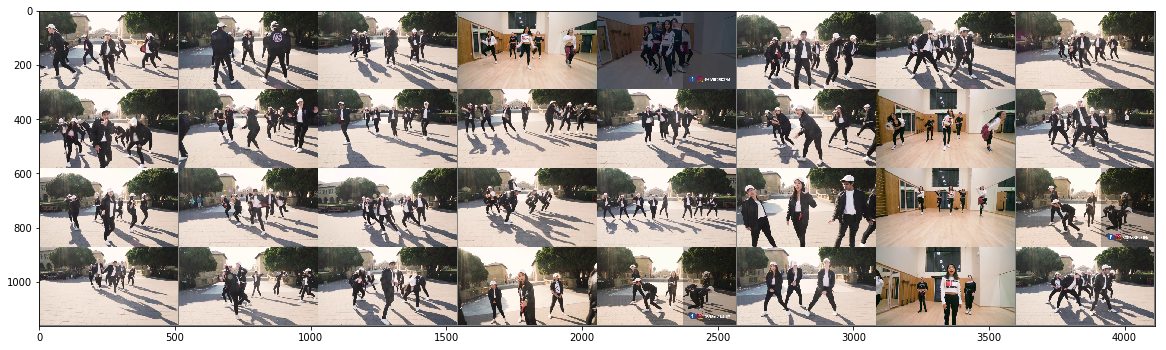

In [19]:
# print(evalGAN(valloader,load_path = "./experiments/unet/30_Generator",sampleImagesName="unet/30/30_val))

In [ ]:
testset = VideoInterpTripletsDataset('datasets/frames_512/test',read_frames=True)
testloader  = DataLoader(testset,batch_size=32,shuffle=True,num_workers=4)

In [ ]:
evalGAN(testloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_test")